In [1]:
import fitdecode
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
# root_path = '/Users/jasperhajonides/Documents/fitness_insights/'

root_path = '/Users/jasperhajonides/Documents/FUN/gpt_fitness_coach/'
os.chdir(root_path)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)


In [2]:
import ipywidgets as widgets
from IPython.display import display

In [3]:
from fitness_insights.extraction.fit_import import LoadFitFiles

%load_ext autoreload
%autoreload 2

# actually load the fit file

In [4]:
lff = LoadFitFiles(directory= root_path + 'data/garmin_test_data/')
df_all_fits = lff.get_fit_data()


/Users/jasperhajonides/Documents/FUN/gpt_fitness_coach/fitness_insights/extraction/fit_import.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_fits['elapsed_time'] = (df_all_fits['timestamp'] - df_all_fits['timestamp'].min()).dt.total_seconds()


In [5]:
lff.dropdown_selection(df_all_fits)
df = lff.df_subset

Dropdown(options=('training_2023-06-28-12-20-08.fit', 'cycling_2023-06-26-18-56-33.fit', 'swimming_2023-06-25-…

In [44]:
df = df_all_fits.loc[df_all_fits.file=='swimming_2023-06-28-17-15-32.fit']

In [6]:
df = lff.df_subset

# upload fit file

# CYCLING

In [153]:
df['timestamp'] = pd.to_datetime(df['timestamp'].dropna())
df.loc['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with invalid datetime values (e.g., 'NaT')
df.dropna(subset=['timestamp'], inplace=True)

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/4059532847.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/4059532847.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/4059532847.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [154]:
df.lactate_threshold_autodetect_enabled.unique()

array([nan], dtype=object)

In [155]:
        gain = df.enhanced_altitude.dropna().diff()
        elevation_gain = int(sum(gain[gain>0]))

In [164]:
df_sel = df.dropna(subset='enhanced_speed')

Text(0, 0.5, 'speed in km/h')

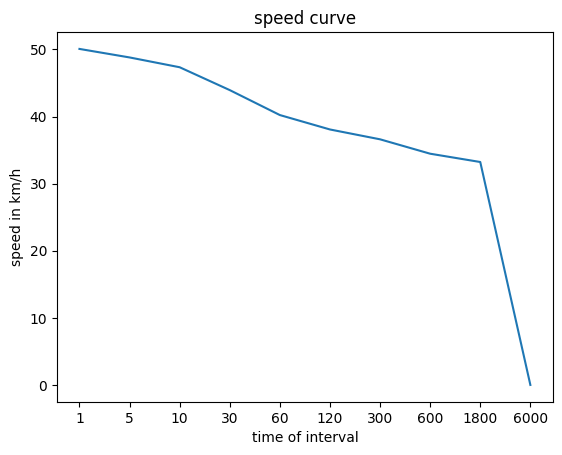

In [208]:
windows = [1,5,10,30,60,120,300,600,1800, 6000]
highest_sum = np.zeros(len(windows))
time_series = df_sel.enhanced_speed
for w, window in enumerate(windows):
#     window = 180
    # Iterate through the time series to calculate sums
    for i in range(len(time_series) - (window-1)):  # Subtract 2 to ensure 3 neighbors are considered
        current_sum = sum(time_series[i:(i+window)])/window

        # Check if the current sum is higher than the highest sum found so far
        if current_sum > highest_sum[w]:
            highest_sum[w] = current_sum
            indices_of_highest_sum = np.arange(i, (i+window))

plt.plot(highest_sum*3.6)
plt.xticks(np.arange(len(windows)),labels=[str(w) for w in windows])
plt.title('speed curve')
plt.xlabel('time of interval')
plt.ylabel('speed in km/h')

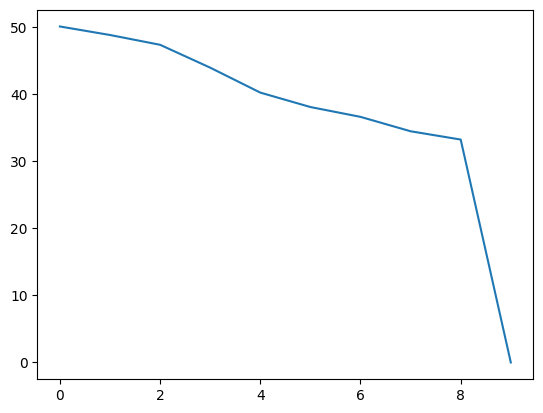

In [196]:
highest_sum

array([13.912     , 13.5594    , 13.1534    , 12.20673333, 11.17398333,
       10.57674167, 10.16936   ,  9.57332167,  9.22968722,  0.        ])

In [186]:
highest_sum*3.6

36.420619999999985

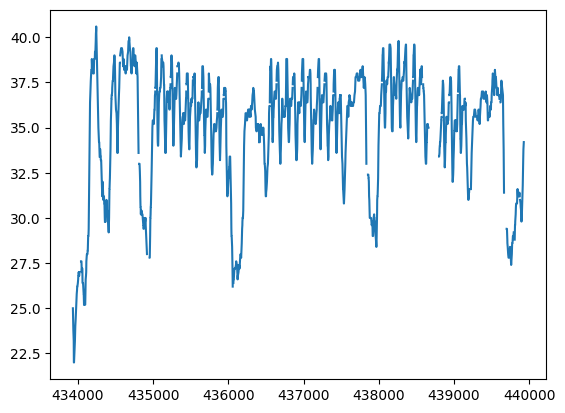

In [161]:
plt.plot(df.elapsed_time,df.enhanced_altitude)

8752    1097.0
Name: total_calories, dtype: object

In [116]:
# df['timestamp'] = pd.to_datetime(pd.to_datetime('today').date().strftime('%Y-%m-%d ') + df['timestamp'].astype(str))

df.loc[:,'start_time_of_day'] = (pd.to_datetime(df['timestamp']) + pd.to_timedelta(3600, unit='s')).dt.time
df.loc[:,'activity_minutes'] = df['timestamp'].dt.minute 

df_cycle = df.dropna(subset='heart_rate').dropna(axis=1).copy()
df_cycle['elapsed_time'] = df_cycle['elapsed_time'] - df_cycle['elapsed_time'].min()

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/1654548705.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/1654548705.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/1654548705.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

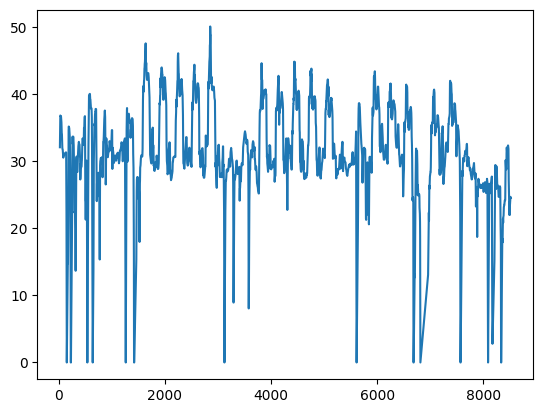

In [119]:
plt.plot(df_cycle.enhanced_speed*3.6)

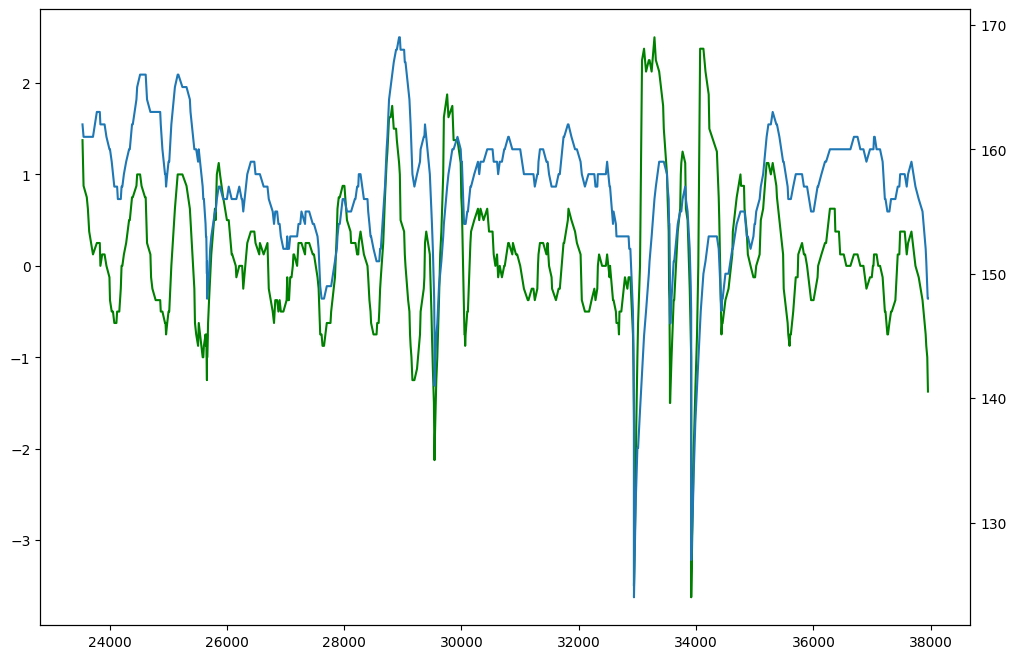

In [51]:

fig, ax = plt.subplots(figsize=(12, 8))


ax.plot(df_cycle['distance'].head(2000).tail(500),df_cycle['heart_rate'].diff().rolling(window=8, min_periods=3).mean().head(2000).tail(500),color='green')
ax2 = ax.twinx()

ax2.plot(df_cycle['distance'].head(2000).tail(500), df_cycle['heart_rate'].head(2000).tail(500))


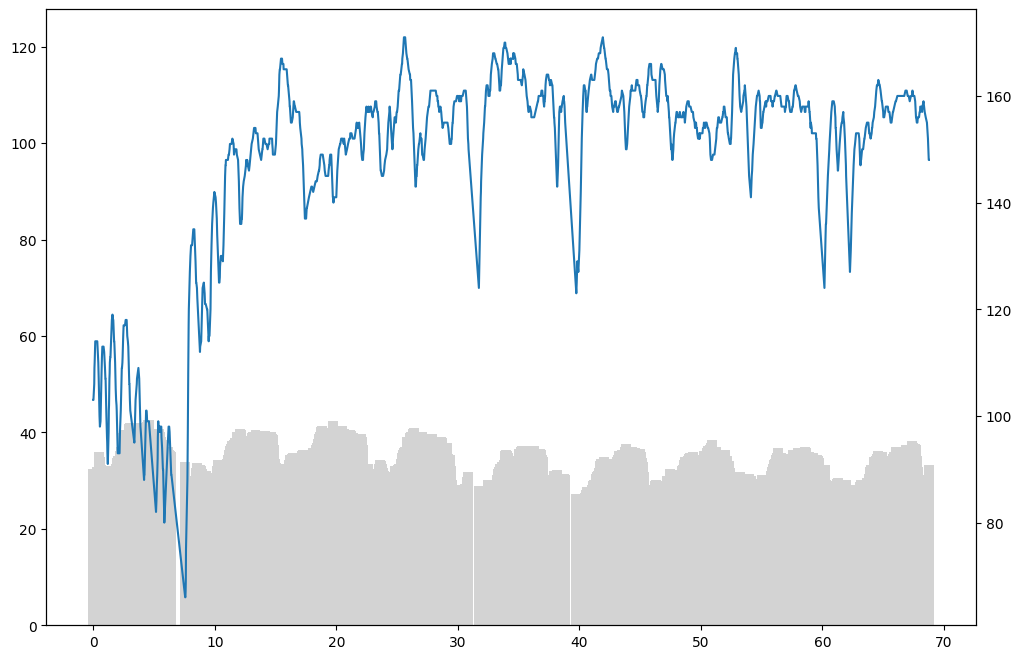

In [52]:

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(df_cycle['elapsed_time']/60, df_cycle['enhanced_altitude'],color='lightgrey')
ax.set_ylim([0, df_cycle['enhanced_altitude'].max()*3])

ax2 = ax.twinx()

ax2.plot(df_cycle['elapsed_time']/60, df_cycle['heart_rate'])


In [315]:
import numpy as np
from scipy.optimize import minimize

def fun(params, x):
    a, b, c = params
    return a*np.power((x*b)/155,c) - (.001+0.002*np.power((x)/155,10))

def cost(params):
    a, b, c = params  # corrected this line
    x_values = np.array([120, 155, 180, 190, 195])
    y_values = np.array([-1/3600, 1/3600, 1/180, 1/45, 1/10])
    return np.sum((fun(params, x_values) - y_values) ** 2)

initial_guess = [0.001, 1.03, 15]
result = minimize(cost, initial_guess)

optimized_params = result.x
print(f"Optimized parameters: {optimized_params}")


Optimized parameters: [1.46977152e-03 8.87006389e-01 4.01393873e+01]


In [256]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample data: Pandas DataFrame with longitude and latitude
df = pd.DataFrame({
    'longitude': [-100.0, -90.0, -80.0, -85.0],
    'latitude': [40.0, 35.0, 30.0, 25.0]
})

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Import the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(10, 15))

# Plot the world map
world.plot(ax=ax, color='lightgrey')

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=50)

# Plot the lines connecting the points
gdf['geometry'].plot(ax=ax, linestyle='-', color='blue', linewidth=2)

plt.show()


      fun: 0.0036841057934437274
 hess_inv: array([[ 6.99828736e-11, -2.43802113e-04,  1.88242648e-06],
       [-2.43802113e-04,  8.96868171e+02, -7.05057363e+00],
       [ 1.88242648e-06, -7.05057363e+00,  1.05460335e+00]])
      jac: array([-4.76237238e+03, -2.50127143e-03, -2.28011137e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 47
     njev: 134
   status: 2
  success: False
        x: array([9.35844519e-08, 4.31423971e+00, 1.49893400e+01])

# cycling geopandas

In [12]:
    x = df['position_long']
    y = df['position_lat']

In [22]:
df[['position_long','position_lat']].dropna()

,position_long,position_lat
25,-2285024.0,614853407.0
31,-2280407.0,614849125.0
33,-2279281.0,614848255.0
39,-2272832.0,614844297.0
41,-2271532.0,614843584.0
...,...,...
8499,-2286815.0,614854583.0
8502,-2288073.0,614855904.0
8505,-2289707.0,614857181.0
8508,-2290616.0,614857948.0


/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/3871004672.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['logitude'] = df['position_long'].apply(lambda x: semicircle_to_degrees(x))
/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/3871004672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logitude'] = df['position_long'].apply(lambda x: semicircle_to_degrees(x))


In [28]:
df['logitude'].dropna()

25     -0.191528
31     -0.191142
33     -0.191047
39     -0.190507
41     -0.190398
          ...   
8499   -0.191679
8502   -0.191784
8505   -0.191921
8508   -0.191997
8514   -0.192357
Name: logitude, Length: 2175, dtype: float64

In [23]:
def semicircle_to_degrees(semicircle):
    return semicircle * (180 / (2 ** 31))

latitude_semicircle = -2285024.0
longitude_semicircle = 614853407.0

latitude_degrees = semicircle_to_degrees(latitude_semicircle)
longitude_degrees = semicircle_to_degrees(longitude_semicircle)

print(f"Latitude in degrees: {latitude_degrees}")
print(f"Longitude in degrees: {longitude_degrees}")

Latitude in degrees: -0.19152849912643433
Longitude in degrees: 51.53641722165048


In [16]:
x.unique()[2]* (180 / 2^31)

TypeError: unsupported operand type(s) for ^: 'float' and 'int'

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78029/2441376564.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


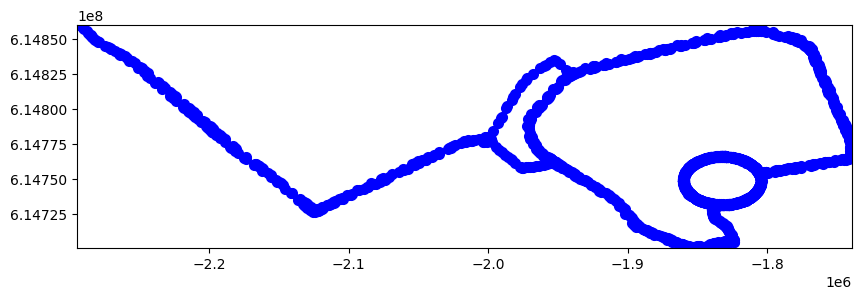

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample data: Pandas DataFrame with longitude and latitude


# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.position_long, df.position_lat))

# Import the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Find the bounds of your points
x_min, x_max = df['position_long'].min() - 1, df['position_long'].max() + 1  # adding/subtracting 1 to add some margin
y_min, y_max = df['position_lat'].min() - 1, df['position_lat'].max() + 1

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey')
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=2)

# Plot the lines connecting the points
gdf['geometry'].plot(ax=ax, linestyle='-', color='blue', linewidth=2)

plt.show()


In [ ]:
import osmnx as ox
import pandas as pd

# Sample data: Pandas DataFrame with longitude and latitude
df2 = pd.DataFrame({
    'longitude': [-100.0, -90.0, -80.0],
    'latitude': [40.0, 35.0, 30.0]
})

# Calculate the bounding box
north = df2['latitude'].max()
south = df2['latitude'].min()
east = df2['longitude'].max()
west = df2['longitude'].min()

# Download the map as a graph
G = ox.graph_from_bbox(north, south, east, west, network_type='all')

# Plot the graph
ox.plot_graph(G)

# SWIMMING

In [7]:
from fitness_insights.swimming_analysis import *
from fitness_insights.swimming_visualisation import *


In [146]:
lff = LoadFitFiles(directory= root_path + 'data/garmin_test_data/')
df_all_fits = lff.get_fit_data()


/Users/jasperhajonides/Documents/FUN/gpt_fitness_coach/fitness_insights/extraction/fit_import.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_fits['elapsed_time'] = (df_all_fits['timestamp'] - df_all_fits['timestamp'].min()).dt.total_seconds()


In [147]:
lff.dropdown_selection(df_all_fits)


Dropdown(options=('training_2023-06-28-12-20-08.fit', 'cycling_2023-06-26-18-56-33.fit', 'swimming_2023-06-25-…

In [193]:
df = lff.df_subset.copy()
print(df.time_created.unique()[0])

2023-06-25 16:32:00


In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Get all the swimming dataframes

In [198]:
df_laps = df.loc[df.event.isin(['length','lap'])]
df_laps = set_swimlap_indices(df_laps)
df_laps = correct_abnormal_rows(df_laps, zscore_threshold=3.75, min_lengths=5)


correct row 47.023000 to 23.511500


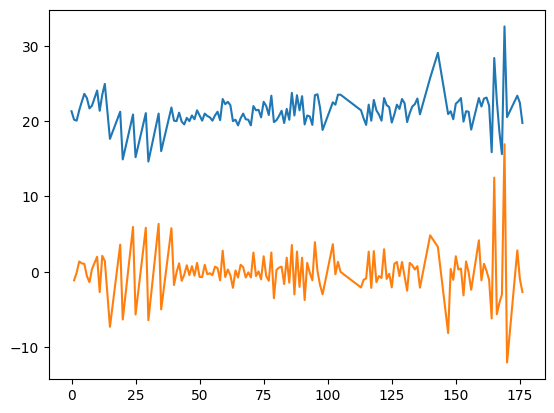

In [199]:
plt.plot(df_laps.loc[df_laps.swim_stroke=='freestyle'].dropna(subset='avg_speed').total_elapsed_time)
plt.plot(df_laps.loc[df_laps.swim_stroke=='freestyle'].dropna(subset='avg_speed').total_elapsed_time.diff())

(array([ 7., 59., 64.,  2.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([14.639 , 17.8774, 21.1158, 24.3542, 27.5926, 30.831 , 34.0694,
        37.3078, 40.5462, 43.7846, 47.023 ]),
 <BarContainer object of 10 artists>)

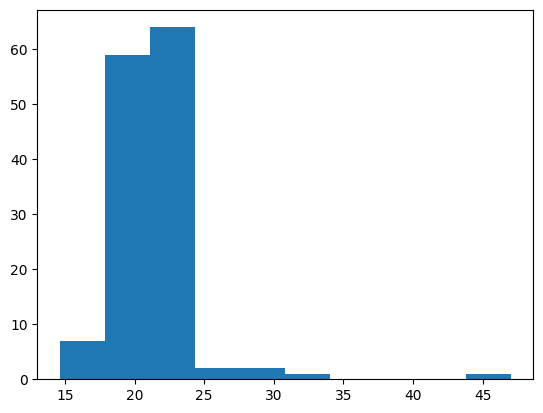

In [196]:
plt.hist(df_laps.loc[df_laps.swim_stroke=='freestyle'].dropna(subset='avg_speed').total_elapsed_time)

In [197]:
corrected_df = correct_abnormal_rows(df_laps, zscore_threshold=3.75, min_lengths=5)
if 'edited' in corrected_df.columns:
    print(corrected_df.edited.sum())

correct row 47.023000 to 23.511500
1


(array([4., 1., 1., 6., 7., 9., 4., 1., 0., 1.]),
 array([16.349 , 17.3641, 18.3792, 19.3943, 20.4094, 21.4245, 22.4396,
        23.4547, 24.4698, 25.4849, 26.5   ]),
 <BarContainer object of 10 artists>)

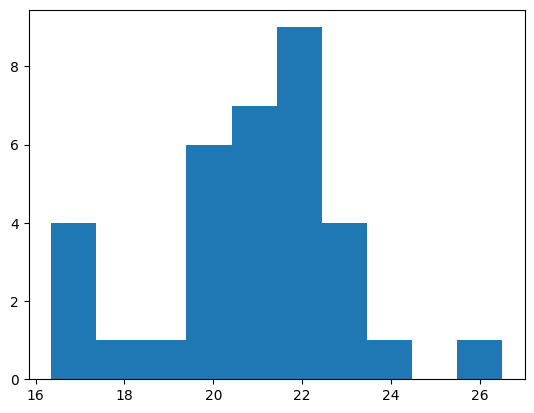

In [179]:
plt.hist(corrected_df.loc[corrected_df.swim_stroke=='freestyle'].dropna(subset='avg_speed').total_elapsed_time)

In [11]:
list(df_laps.columns)

['sub_sport',
 'total_distance',
 'total_elapsed_time',
 'total_cycles',
 'avg_stroke_count',
 'total_calories',
 'avg_speed',
 'num_laps',
 'num_active_lengths',
 'avg_heart_rate',
 'swim_stroke',
 'num_lengths',
 'first_length_index',
 'avg_swimming_cadence',
 'total_strokes',
 'length_type',
 'elapsed_time',
 'lap_nr',
 'length_nr',
 'cumsum',
 'start_time',
 'time_interval',
 'SWOLF']

In [12]:

df_laps = set_swimlap_indices(df)

df_hr = df.dropna(subset='heart_rate')[['elapsed_time','heart_rate']]

# get heart rate epochs
distance_data = obtain_hr_epochs(df_hr, df_laps)

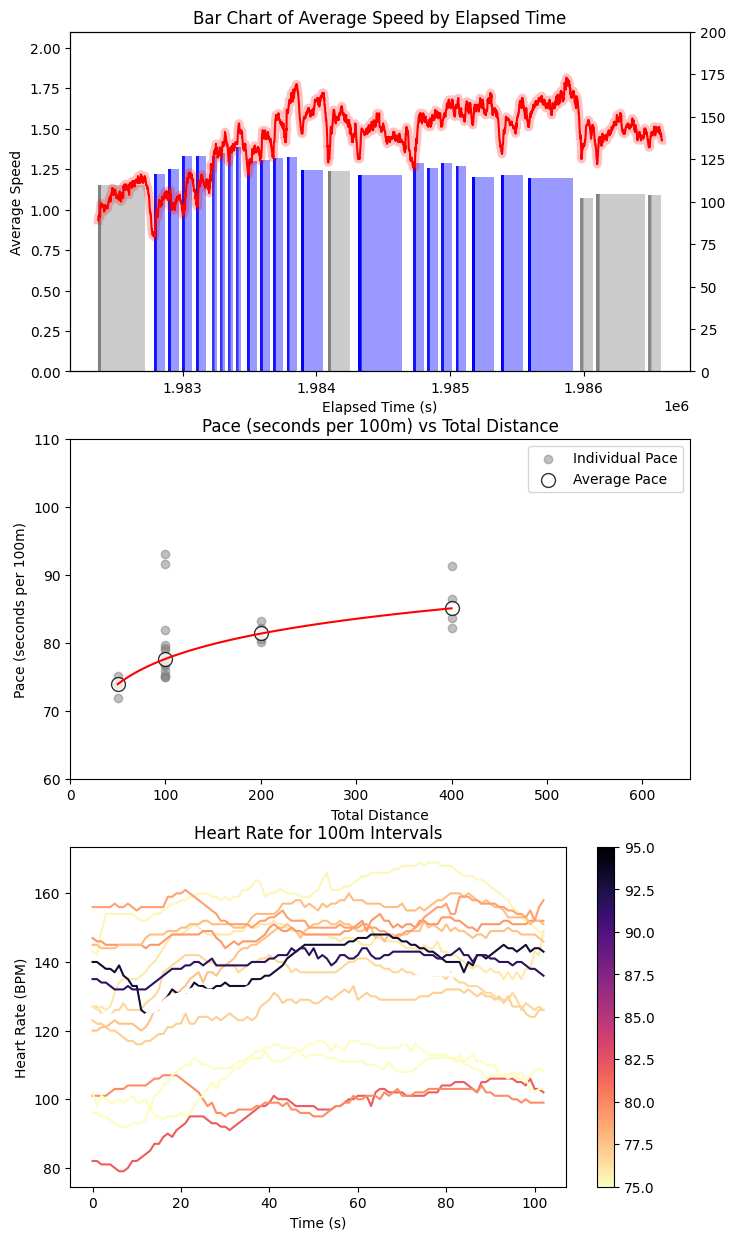

In [13]:
fig, ax = plt.subplots(3,1,figsize=(8,15))

plot_all_reps_swimset(df_laps, df_hr, ax[0])
plot_avg_paces(df_laps,ax[1])
plot_hr_intervals(distance_data,ax[2],distance=100)


In [14]:
df.file.unique()

array(['swimming_2023-07-14-17-03-50.fit'], dtype=object)

# adapt paceplot code for website

In [222]:
df_filtered.loc[].dropna(axis=1)['file']

SyntaxError: invalid syntax (1741691875.py, line 1)

In [88]:
df_laps = set_swimlap_indices(df_all_fits.loc[df_all_fits['file'] =='swimming_2023-06-28-17-15-32.fit' ])

/Users/jasperhajonides/Documents/FUN/gpt_fitness_coach/fitness_insights/swimming_analysis.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/jasperhajonides/Documents/FUN/gpt_fitness_coach/fitness_insights/swimming_analysis.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [82]:
df_laps.total_distance.unique()

array([  nan,  375.,    0.,   25.,   50.,  200.,  100.,  400., 3800.])

(array([ 1.,  0.,  2., 31., 96.,  4.,  9.,  8.,  0.,  1.]),
 array([ 1.216 ,  5.8407, 10.4654, 15.0901, 19.7148, 24.3395, 28.9642,
        33.5889, 38.2136, 42.8383, 47.463 ]),
 <BarContainer object of 10 artists>)

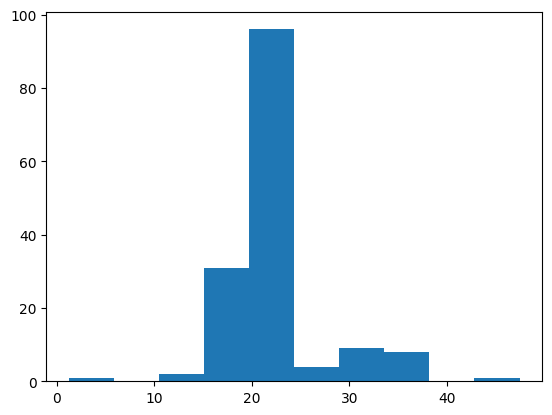

In [96]:
plt.hist(df_laps.dropna(subset='avg_speed').total_elapsed_time)

In [93]:
df_laps.avg_speed.unique()

array([ 1.087,  1.262,  1.278,  1.444,  0.83 ,  1.201,  1.212,  1.031,
        1.153,  1.102,  1.786,  0.527,    nan, 20.559,  1.124,  1.513,
        1.14 ,  1.569,  1.156,  1.385,  1.351,  1.176,  1.258,  1.19 ,
        1.183,  1.143,  1.242,  1.448,  1.274,  1.266,  1.282,  1.286,
        1.223,  1.461,  1.307,  1.205,  1.198,  1.22 ,  1.039,  1.303,
        1.372,  1.166,  1.235,  1.17 ,  1.136,  1.365,  1.227,  1.216,
        1.25 ,  1.332,  1.27 ,  1.133,  1.409,  1.149,  1.231,  1.238,
        1.163,  1.152,  1.375,  1.194,  1.208,  1.457,  1.047,  1.014,
        1.105,  1.093,  1.277,  1.072,  1.297,  0.752,  0.729,  1.18 ,
        1.263,  1.117,  1.099,  1.005,  1.058,  1.108,  0.993,  1.02 ,
        1.084,  1.111,  1.257,  1.114,  1.044])

In [89]:
df_laps.loc[df_laps.total_distance==375,'lap_nr']

15    0
Name: lap_nr, dtype: int64

(278, 174)
(847, 174)


/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_67038/3690630032.py:38: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_67038/3690630032.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jasperhajonides/miniconda3/envs/garmin/lib/python3.11/site-packages/pandas/core/indexes/base.py:911: RuntimeWarning:

invalid value encountered in log

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_67038/3690630032.py:38: PerformanceWarning:

Da

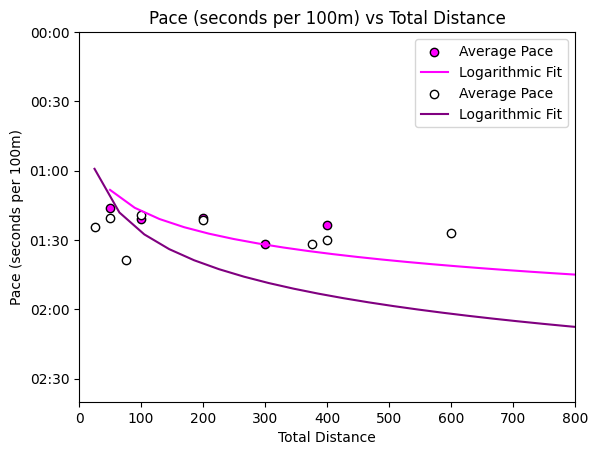

In [203]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

def logarithmic_func(x, a, b, c):
    return a * np.log(b * x) + c

def set_swimlap_indices(df):  # Dummy function for the example
    return df



activity_file = 'swimming_2023-06-21-18-24-20.fit'

all_files = [name for name in df_all_fits['file'].unique() if 'swimming' in name]
other_files = [name for name in all_files if name != activity_file]
only_current_activity = len(other_files) < 2

highest_pace = 0
for is_current_activity, fit_color, avg_color in [(True, 'magenta', 'magenta'),
                                                  (False, 'purple', 'white')]:

    if only_current_activity and not is_current_activity:
        continue

    condition = (df_all_fits['file'] == activity_file) if is_current_activity else (df_all_fits['file'] != activity_file)
    df_filtered = df_all_fits.loc[df_all_fits['event'].isin(['length', 'lap']) & condition & df_all_fits['file'].str.contains('swim')] # add Condition file contains swim
    df_laps = set_swimlap_indices(df_filtered)
    print(df_laps.shape)
    
    # remove faulty total distance numbers
    data_filtered = df_laps[df_laps['total_distance'].notna() & (df_laps['total_distance'] != 0)]
    
    # correct er
    
    #calculate pace
    data_filtered['pace'] = (data_filtered['total_elapsed_time'] * 100) / data_filtered['total_distance']
    
    

    highest_pace = highest_pace if data_filtered['pace'].max() < highest_pace else data_filtered['pace'].max()

    grouped_data = data_filtered.loc[(data_filtered['sub_sport']=='lap_swimming') & (data_filtered['swim_stroke'] != 'drill')].groupby(['total_distance'])['pace'].median()
    selected_distances = [50, 100, 150, 200, 300, 400, 800]
    grouped_data_filtered = grouped_data[grouped_data.index.isin(selected_distances)]

    if grouped_data_filtered.empty:
        continue

    plt.scatter(grouped_data.index, grouped_data.values, c=avg_color, edgecolors='black', label='Average Pace')
    params, _ = curve_fit(logarithmic_func, grouped_data.index, grouped_data.values)
    x_fit = np.linspace(grouped_data.index.min(), grouped_data.index.max(), 100)
    y_fit = logarithmic_func(x_fit, *params)

    plt.plot(x_fit, y_fit, color=fit_color, label='Logarithmic Fit')

y_max = min(int(np.ceil(highest_pace / 10) * 10),150) + 10
tickvals = list(range(0, y_max + 1, 30))
ticktext = [f"{int(val // 60):02d}:{int(val % 60):02d}" for val in tickvals]

plt.ylim([y_max, 30])
plt.yticks(tickvals, ticktext)
plt.xlim([0, 800])
plt.xlabel('Total Distance')
plt.ylabel('Pace (seconds per 100m)')
plt.title('Pace (seconds per 100m) vs Total Distance')
plt.legend()
plt.show()

# Dummy DataFrame and activity file for the example
# df_all_fits = pd.DataFrame(...)
# activity_file = "some_file"

# plot_avg_paces(df_all_fits, activity_file)


In [34]:
df_all_fits['file'].unique()

array(['training_2023-06-28-12-20-08.fit',
       'cycling_2023-06-26-18-56-33.fit',
       'swimming_2023-06-25-17-32-00.fit',
       'training_2023-07-13-12-09-14.fit',
       'swimming_2023-07-14-17-03-50.fit',
       'cycling_2023-07-16-11-17-38.fit',
       'cycling_2023-07-12-18-28-42.fit',
       'swimming_2023-06-28-17-15-32.fit',
       'training_2023-06-22-12-11-17.fit',
       'swimming_2023-06-21-18-24-20.fit',
       'running_2023-06-23-12-56-43.fit',
       'training_2023-06-26-12-06-57.fit',
       'swimming_2023-06-23-16-46-38.fit',
       'training_2023-06-27-12-08-51.fit',
       'training_2023-07-11-12-14-30.fit'], dtype=object)

In [168]:
df = df_all_fits[df_all_fits['file'].str.startswith('swimming')]

/var/folders/nx/9p_nwvbx1_bg15jk8zx5bqb80000gn/T/ipykernel_4150/1387087799.py:128: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma_r')


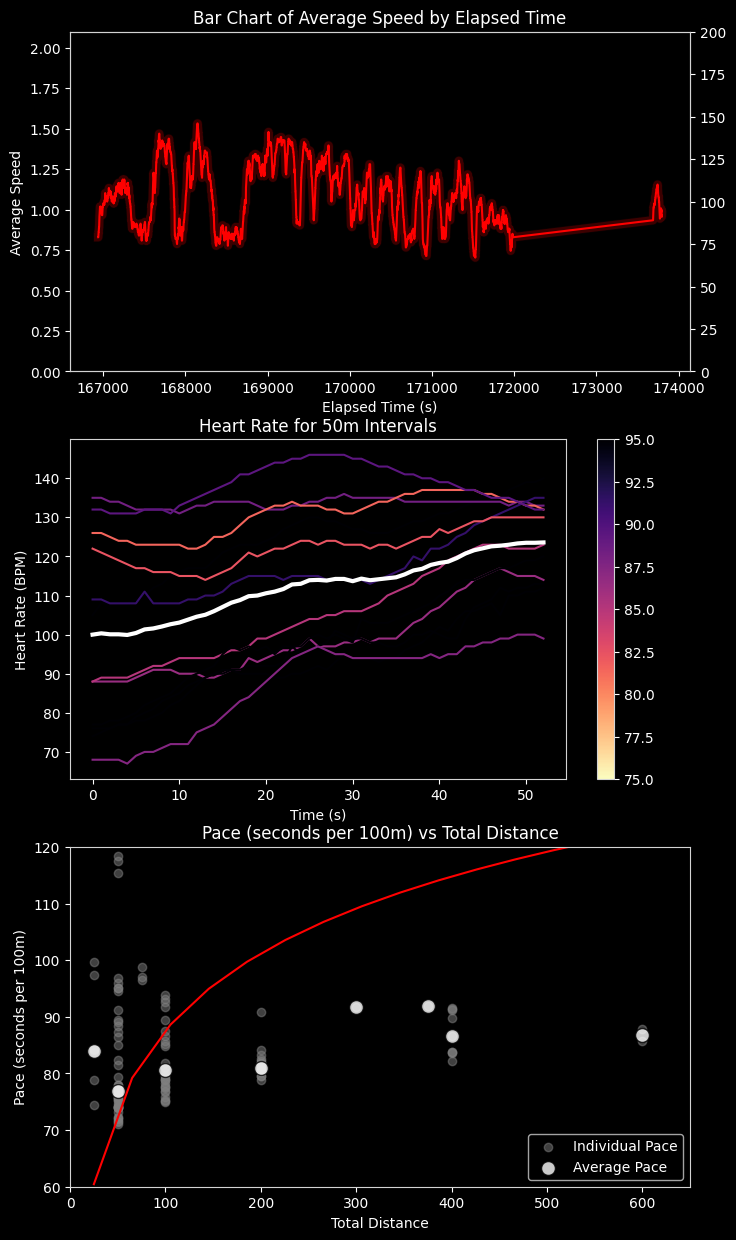

In [170]:
fig, ax = plt.subplots(3,1,figsize=(8,15))


plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

plot_all_reps_swimset(df_laps, df_hr,ax=ax[0])

plot_hr_intervals(distance_data, ax[1], distance = 50)
    
plot_avg_paces(df_laps,ax=ax[2],ylim=[60,120])

## add to dataframe

In [343]:
lff.dropdown_selection(df_all_fits)


Dropdown(options=('training_2023-06-28-12-20-08.fit', 'cycling_2023-06-26-18-56-33.fit', 'swimming_2023-06-25-…

In [346]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [446]:
df3 = df

In [445]:
df = lff.df_subset.copy()
print(df.time_created.unique()[0])

2023-07-12 17:28:43


In [361]:
[i for i in df.columns if 'alt' in i]

['enhanced_altitude',
 'enhanced_avg_altitude',
 'enhanced_min_altitude',
 'enhanced_max_altitude']

In [372]:
df.reset_index(drop=True,inplace=True)
df = df.dropna()

In [462]:
df = pd.concat([df1,df2,df3])

In [449]:
df.shape

(17955, 176)

In [463]:
from hmmlearn import hmm

# df[['heart_rate', 'speed', 'elevation']] = df[['heart_rate', 'speed', 'elevation']].clip(lower=0).apply(int)

# df = lff.df_subset.copy()

df.reset_index(drop=True,inplace=True)
df['elevation_change'] = df.enhanced_altitude.diff()

df = df.dropna(subset=['enhanced_speed', 'heart_rate','elevation_change'])
df = df[['enhanced_speed', 'heart_rate', 'elevation_change']]
observations = df.values

# Define the number of states
n_states = 3

# Create an HMM model with Gaussian emissions
model = hmm.GaussianHMM(n_components=n_states)

# Fit the model to the observations
model.fit(observations)

# Define the minimum duration for each state visit (in number of time points)
min_duration = 30

# Predict the most likely state sequence using the Viterbi algorithm
log_likelihood, state_sequence = model.decode(observations)

# Apply the minimum duration constraint to the state sequence
filtered_state_sequence = []
current_state = state_sequence[0]
current_duration = 1

for i in range(1, len(state_sequence)):
    if state_sequence[i] == current_state:
        current_duration += 1
    else:
        if current_duration >= min_duration:
            filtered_state_sequence.extend([current_state] * current_duration)
        else:
            filtered_state_sequence.extend([state_sequence[i-1]] * current_duration)
        current_state = state_sequence[i]
        current_duration = 1

# Extend the state sequence for the remaining time points
if current_duration >= min_duration:
    filtered_state_sequence.extend([current_state] * current_duration)
else:
    filtered_state_sequence.extend([state_sequence[-1]] * current_duration)

# Add the predicted filtered state sequence to the original dataframe
df['filtered_states'] = filtered_state_sequence

# Print the state sequence for each observation
for i, state in enumerate(filtered_state_sequence):
    print(f"Observation {i+1} is in state {state+1}")

Observation 1 is in state 1
Observation 2 is in state 1
Observation 3 is in state 1
Observation 4 is in state 1
Observation 5 is in state 1
Observation 6 is in state 1
Observation 7 is in state 1
Observation 8 is in state 1
Observation 9 is in state 1
Observation 10 is in state 1
Observation 11 is in state 1
Observation 12 is in state 1
Observation 13 is in state 1
Observation 14 is in state 1
Observation 15 is in state 1
Observation 16 is in state 1
Observation 17 is in state 1
Observation 18 is in state 1
Observation 19 is in state 1
Observation 20 is in state 1
Observation 21 is in state 1
Observation 22 is in state 1
Observation 23 is in state 1
Observation 24 is in state 1
Observation 25 is in state 1
Observation 26 is in state 1
Observation 27 is in state 1
Observation 28 is in state 1
Observation 29 is in state 1
Observation 30 is in state 1
Observation 31 is in state 1
Observation 32 is in state 1
Observation 33 is in state 1
Observation 34 is in state 1
Observation 35 is in st

(array([ 815.,    0.,    0.,    0.,    0., 1551.,    0.,    0.,    0.,
        1018.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

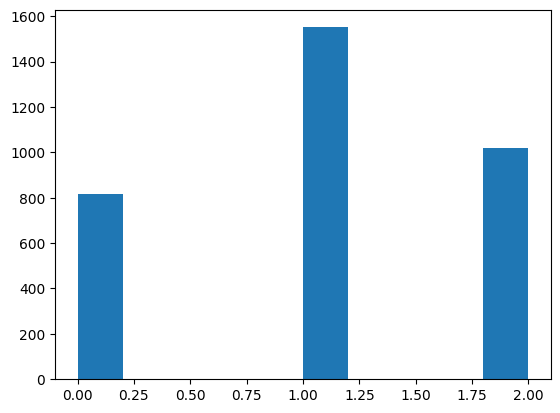

In [464]:
plt.hist(df['filtered_states'])

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_78073/2933464568.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_states))


Text(0, 0.5, 'count')

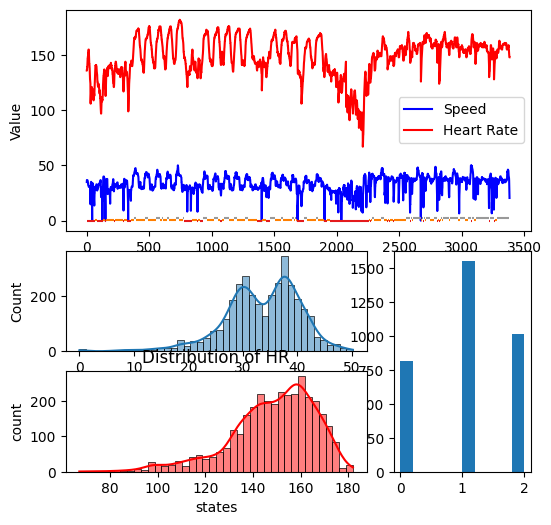

In [467]:
import seaborn as sns

# Set up the figure and axes
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
 
ax1 = plt.subplot2grid(shape=(4, 3), loc=(0, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid(shape=(4, 3), loc=(2, 0), colspan=2, rowspan=1)
ax3 = plt.subplot2grid(shape=(4, 3), loc=(2, 2), rowspan=2)
# ax4 = plt.subplot2grid((4, 3), (3, 0))
ax5 = plt.subplot2grid((4, 3), (3, 0), colspan=2,rowspan=1)

############## plot the time series with states #################
# Plot speed as a line plot
ax1.plot(np.arange(len(df)),df.enhanced_speed*3.6, color='blue', label='Speed')

# Plot heart rate as a line plot
ax1.plot(np.arange(len(df)),df.heart_rate, color='red', label='Heart Rate')
ax1.legend()

# Get unique states and assign a color to each state
df.reset_index(drop=True,inplace=True)
unique_states = df.filtered_states.unique()
colors = plt.cm.get_cmap('Set1', len(unique_states))

# Plot filtered state as a horizontal line underneath the speed line
current_state = df.filtered_states[0]
start = 0

for i in range(1, len(df.filtered_states)):
    if df.filtered_states[i] != current_state:
        ax1.hlines(current_state, start, i, colors=colors(current_state), label=f'State {current_state+1}')
        current_state = df.filtered_states[i]
        start = i

# Add legend and labels
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')


########### plot the speed hist ############

# Create a distplot of the speed variable
sns.histplot(df.enhanced_speed*3.6, bins='auto',kde=True, ax=ax2)

# Set the labels and title
plt.xlabel('Speed')
plt.ylabel('Density')
plt.title('Distribution of Speed')


########### plot the HR hist ############

# Create a distplot of the speed variable
sns.histplot(df.heart_rate, bins='auto',kde=True, ax=ax5, color='red')

# Set the labels and title
plt.xlabel('beats/min')
plt.ylabel('Density')
plt.title('Distribution of HR')

########### plot the hmm hist ############

# Create a distplot of the speed variable
ax3.hist(df.filtered_states)

# Set the labels and title
plt.xlabel('states')
plt.ylabel('count')


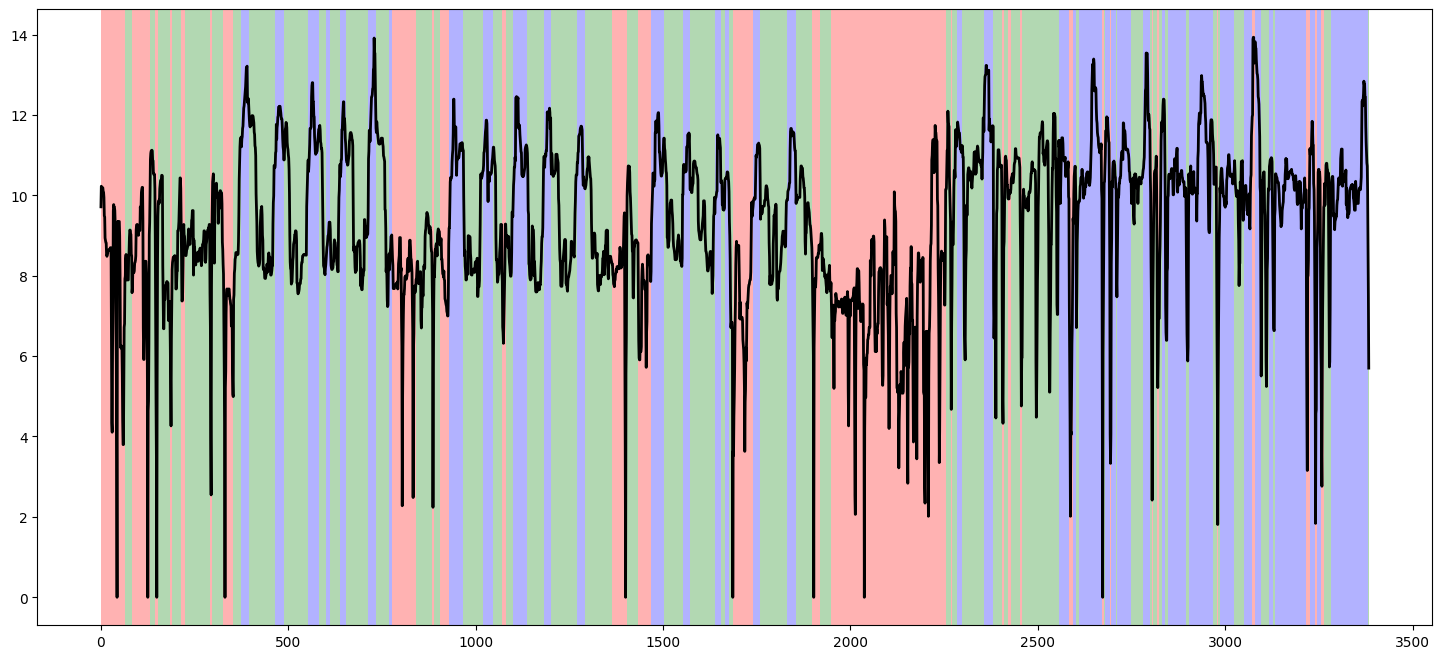

In [466]:
fig, ax = plt.subplots(1,1,figsize=(18,8))



states = df.filtered_states.to_numpy()

# Define a colormap to use
color_map = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'yellow'
}

# Add background colors
for i in range(len(df)):
    ax.axvspan(i-0.5, i+0.5, facecolor=color_map[states[i]], alpha=0.3)
ax.plot(np.arange(len(df)),df.enhanced_speed, color='k',linewidth=2)


In [417]:
df.groupby('filtered_states').mean()

,enhanced_speed,heart_rate,elevation_change
filtered_states,,,
0,8.505811,145.100993,-0.842715
1,8.114713,130.278396,2.346102
2,10.539146,166.841432,1.144501
3,7.229996,131.858333,-5.420833


# swimming

In [15]:
import fitparse
from tqdm import tqdm
import os

In [120]:
df_sel = df_laps

In [125]:
df_sel['time_diff'] = df_sel['total_elapsed_time'].diff().abs()
df_sel['cadence_diff'] = df_sel['avg_swimming_cadence'].diff().abs()

# calculate the average time difference
avg_time_diff = df_sel['time_diff'].mean()

# identify the rows where the time difference is much greater than the average and swimming cadence is still similar
mask = ((df_sel['time_diff'] > 5) & (df_sel['cadence_diff'] <5))

# get the indices of the start of each pair
starts = df_sel.index[mask]

# calculate the average time for each pair and assign it to both rows
for start in starts:
    avg_time = df_sel.loc[start:start+1, 'total_elapsed_time'].mean()
    df_sel.loc[start:start+1, 'total_elapsed_time'] = avg_time

# delete the 'time_diff' column as it's no longer needed
df_sel.drop('time_diff', axis=1, inplace=True)

(array([ 1.,  0.,  0.,  1.,  1.,  3.,  2.,  3.,  2.,  3.,  5.,  4.,  0.,
         2.,  0.,  3.,  1.,  1.,  4.,  2.,  2.,  2.,  5.,  6.,  6.,  7.,
         4.,  8., 11.,  2.,  8.,  6., 10.,  3.,  9.,  7.,  1.,  1.,  3.,
         1.,  0.,  0.,  0.,  1.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([14.437  , 14.66305, 14.8891 , 15.11515, 15.3412 , 15.56725,
        15.7933 , 16.01935, 16.2454 , 16.47145, 16.6975 , 16.92355,
        17.1496 , 17.37565, 17.6017 , 17.82775, 18.0538 , 18.27985,
        18.5059 , 18.73195, 18.958  , 19.18405, 19.4101 , 19.63615,
        19.8622 , 20.08825, 20.3143 , 20.54035, 20.7664 , 20.99245,
        21.2185 , 21.44455, 21.6706 , 21.89665, 22.1227 , 22.34875,
        22.5748 , 22.80085, 23.0269 , 23.25295, 23.479  , 23.70505,
        23.9311 , 24.15715, 24.3832 , 24.60925, 24.8353 , 25.06135,
        25.2874 , 25.51345, 25.7395 , 25.96555, 26.1916 , 26.41765,
        26.6437 , 26.86975, 27.0958 , 27.32185

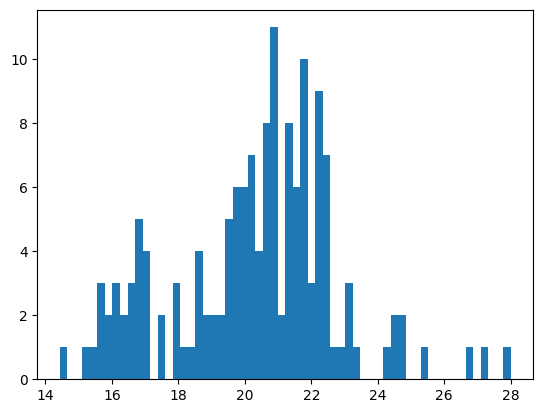

In [279]:
plt.hist(df_laps.loc[(df_laps.length_nr>0) & (df_laps.swim_stroke == 'freestyle') ,'total_elapsed_time'],bins=60)



In [18]:
stroke_counts = df_laps.loc[(df_laps.length_nr>0),'swim_stroke'].value_counts()

# not interested in drill counts
# del stroke_counts['drill']
stroke_counts

swim_stroke
freestyle       154
backstroke        3
breaststroke      3
Name: count, dtype: int64

In [35]:
# loop over strokes that have enough data to perform corrections
for stroke in stroke_counts[stroke_counts > 20].keys():
    
    df_stroke = df_laps.loc[(df_laps.swim_stroke==stroke) & (df_laps.length_nr>0)].copy()
    times = df_stroke['total_elapsed_time']

(array([48., 38., 21., 15., 11.,  6.,  6.,  6.,  2.,  1.]),
 array([0.01037056, 0.31695605, 0.62354154, 0.93012703, 1.23671252,
        1.54329801, 1.8498835 , 2.15646899, 2.46305448, 2.76963997,
        3.07622546]),
 <BarContainer object of 10 artists>)

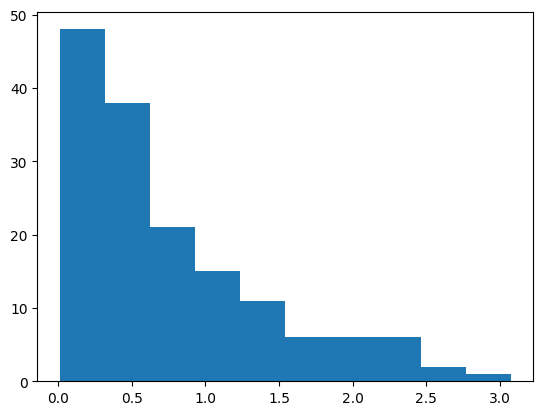

In [38]:
plt.hist(abs_z_scores)

In [37]:
import numpy as np
from scipy import stats


z_scores = stats.zscore(times)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)

In [289]:
for i in df_stroke[outliers].index:
    print(i)

1


In [186]:
df_example

,total_elapsed_time,total_distance,swim_stroke,avg_speed,lap_nr,length_nr,length_type
33,22.886,0.0,None,NaN,7,None,NaN
34,21.125,NaN,freestyle,1.183,8,1,active
35,19.594,NaN,freestyle,1.276,8,2,active
36,40.719,50.0,freestyle,NaN,8,None,NaN
37,183.571,NaN,None,NaN,9,1,idle
38,183.571,0.0,None,NaN,9,None,NaN
39,23.062,NaN,butterfly,1.084,10,1,active
40,19.471,NaN,backstroke,1.284,10,2,active
41,39.312,50.0,mixed,0.600,10,None,NaN
42,35.529,NaN,None,NaN,11,1,idle


In [184]:
df_example = df_laps.head(50).tail(17)[['total_elapsed_time','total_distance','swim_stroke','avg_speed','lap_nr','length_nr','length_type']].copy()
df_example.loc[41,'total_elapsed_time'] = 19.312+20
df_example.loc[44,'total_elapsed_time'] = 75.072+20
df_example.loc[41,'avg_speed'] = 0.6


In [185]:
import pandas as pd
from scipy.stats import zscore

def correct_abnormal_rows(df, zscore_threshold=3.5, min_lengths = 20):
    """
    Given a DataFrame with swimming split times, this function corrects abnormal rows by splitting
    them into two and adjusts the elapsed times and total distance.

    Parameters:
        df (DataFrame): Input DataFrame containing swimming splits data.
        zscore (float): outlier threshold
        min_lengths (int): min number of lengths in order to get reliable distribution to detect outliers

    Returns:
        DataFrame: Corrected DataFrame with updated total distance and speed.
    """


    strokes = ['freestyle', 'breaststroke', 'butterfly', 'backstroke']
    for stroke in strokes:
        stroke_data = df[df['swim_stroke'] == stroke]
        if len(stroke_data) >= min_lengths:
            active_stroke_data = stroke_data[stroke_data['length_type'] == 'active']
            z_scores = zscore(active_stroke_data['total_elapsed_time'])

            # Pair z-scores with their corresponding index
            z_indices = active_stroke_data.index
            z_dict = dict(zip(z_indices, z_scores))

            # Identify abnormal rows
            abnormal_indices = [index for index, z_val in z_dict.items() if z_val > zscore_threshold]


            for index, row in df.loc[abnormal_indices].iterrows():
                print('correct row %f to %f' %(row['total_elapsed_time'], row['total_elapsed_time']/2))
                corrected_time = row['total_elapsed_time'] / 2
                corrected_speed = row['avg_speed'] * 2
                lap_nr = row['lap_nr']
                length_nr = row['length_nr']

                # Update the original row
                df.loc[index, 'total_elapsed_time'] = corrected_time
                df.loc[index, 'avg_speed'] = corrected_speed

                # Create a new row with corrected time and speed
                new_row = row.copy()
                new_row['total_elapsed_time'] = corrected_time
                new_row['avg_speed'] = corrected_speed
                new_row['length_nr'] = length_nr + 0.5
                new_row['edited'] = True
                
                # Update the total distance for summary row
                summary_idx = df[(df['lap_nr'] == lap_nr) & df['length_nr'].isna()].index[0]
                df.loc[summary_idx, 'total_distance'] += 25.0  # Assuming 25m pool

                # Append the new row
                df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True).sort_values(by=['lap_nr', 'length_nr']).reset_index(drop=True)

    return df

# Your DataFrame
# Call the function
corrected_df = correct_abnormal_rows(df_example, zscore_threshold=2.0, min_lengths=5)
print(corrected_df)

    total_elapsed_time  total_distance   swim_stroke  avg_speed  lap_nr  \
33              22.886             0.0          None        NaN       7   
34              21.125             NaN     freestyle      1.183       8   
35              19.594             NaN     freestyle      1.276       8   
36              40.719            50.0     freestyle        NaN       8   
37             183.571             NaN          None        NaN       9   
38             183.571             0.0          None        NaN       9   
39              23.062             NaN     butterfly      1.084      10   
40              19.471             NaN    backstroke      1.284      10   
41              39.312            50.0         mixed      0.600      10   
42              35.529             NaN          None        NaN      11   
43              35.529             0.0          None        NaN      11   
44              95.072             NaN    backstroke      0.995      12   
45              20.508   

In [113]:
corrected_df

,total_elapsed_time,total_distance,swim_stroke,avg_speed,lap_nr,length_nr,length_type,edited
0,19.125,NaN,freestyle,1.307,6,1,active,NaN
1,20.062,NaN,freestyle,1.246,6,2,active,NaN
2,20.250,NaN,freestyle,1.235,6,3,active,NaN
3,15.520,NaN,freestyle,1.611,6,4,active,NaN
4,51.677,100.0,freestyle,NaN,6,None,NaN,NaN
5,31.759,NaN,None,NaN,7,1,idle,NaN
6,31.759,0.0,None,NaN,7,None,NaN,NaN
7,20.562,NaN,freestyle,1.216,8,1,active,NaN
8,19.656,NaN,freestyle,1.200,8,2,active,NaN
9,19.656,NaN,freestyle,1.200,8,2.5,active,True


In [47]:
df_example

,total_elapsed_time,swim_stroke,lap_nr,length_nr,length_type
33,19.125,freestyle,6,1,active
34,20.062,freestyle,6,2,active
35,20.250,freestyle,6,3,active
36,15.520,freestyle,6,4,active
37,51.677,freestyle,6,None,NaN
38,31.759,None,7,1,idle
39,31.759,None,7,None,NaN
40,20.562,freestyle,8,1,active
41,19.656,freestyle,8,2,active
42,20.000,freestyle,8,3,active


In [268]:
df_stroke.loc[outliers]
# df_stroke.loc['total_elapsed_time']=df_stroke['total_elapsed_time'].values/2

,sub_sport,total_distance,total_elapsed_time,total_cycles,avg_stroke_count,total_calories,avg_speed,num_laps,num_active_lengths,avg_heart_rate,swim_stroke,num_lengths,first_length_index,avg_swimming_cadence,total_strokes,length_type,elapsed_time,lap_nr,length_nr,cumsum,start_time,time_interval,SWOLF


In [259]:
df_stroke[outliers]

/var/folders/r6/k_cdzkx14flddy2y0tvhd57r0000gn/T/ipykernel_67038/3045271552.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [248]:
df_laps.loc[df_laps.lap_nr==0]['total_elapsed_time'].diff()

0         NaN
1       6.125
2     -10.063
3       6.375
4      -2.187
5      -2.125
6       5.500
7      -4.688
8       4.000
9      -2.625
10      2.500
11     -1.602
12    252.247
Name: total_elapsed_time, dtype: float64

In [188]:
df_stroke.loc[i,'avg_speed'] = df_stroke.loc[i,'avg_speed']*2

In [202]:
df_laps.loc[df_laps.lap_nr==30]

,sub_sport,total_distance,total_elapsed_time,total_cycles,avg_stroke_count,total_calories,avg_speed,num_laps,num_active_lengths,avg_heart_rate,swim_stroke,num_lengths,first_length_index,avg_swimming_cadence,total_strokes,length_type,elapsed_time,lap_nr,length_nr,cumsum,start_time,time_interval,SWOLF
121,NaN,NaN,21.562,NaN,NaN,5.0,1.159,NaN,NaN,NaN,freestyle,NaN,NaN,25.0,9.0,active,2162.0,30,1,21.562,2123.007,38.993,30.562
122,NaN,NaN,17.431,NaN,NaN,5.0,1.434,NaN,NaN,NaN,freestyle,NaN,NaN,31.0,9.0,active,2162.0,30,2,38.993,2123.007,38.993,26.431
123,lap_swimming,50.0,38.993,18.0,NaN,10.0,NaN,NaN,2.0,150.0,freestyle,2.0,91.0,NaN,NaN,NaN,2162.0,30,None,NaN,2123.007,38.993,NaN


In [200]:
df_sel.loc[df_sel['lap_nr'] == df_stroke.loc[i,'lap_nr']]

,sub_sport,total_distance,total_elapsed_time,total_cycles,avg_stroke_count,total_calories,avg_speed,num_laps,num_active_lengths,avg_heart_rate,swim_stroke,num_lengths,first_length_index,avg_swimming_cadence,total_strokes,length_type,elapsed_time,lap_nr,length_nr,cumsum,start_time,time_interval,SWOLF,cadence_diff
141,NaN,NaN,21.6250,NaN,NaN,5.0,1.156,NaN,NaN,NaN,freestyle,NaN,NaN,25.0,9.0,active,603139.0,30,1,21.625,602973.834,165.166,30.625,NaN
142,NaN,NaN,19.8750,NaN,NaN,5.0,1.258,NaN,NaN,NaN,freestyle,NaN,NaN,33.0,11.0,active,603139.0,30,2,41.500,602973.834,165.166,30.875,8.0
143,NaN,NaN,20.8750,NaN,NaN,5.0,1.198,NaN,NaN,NaN,freestyle,NaN,NaN,32.0,11.0,active,603139.0,30,3,62.375,602973.834,165.166,31.875,1.0
144,NaN,NaN,21.7500,NaN,NaN,5.0,1.149,NaN,NaN,NaN,freestyle,NaN,NaN,30.0,11.0,active,603139.0,30,4,84.125,602973.834,165.166,32.750,2.0
145,NaN,NaN,18.5000,NaN,NaN,8.0,1.351,NaN,NaN,NaN,breaststroke,NaN,NaN,36.0,11.0,active,603139.0,30,5,102.625,602973.834,165.166,29.500,6.0
146,NaN,NaN,18.9375,NaN,NaN,5.0,1.047,NaN,NaN,NaN,freestyle,NaN,NaN,35.0,14.0,active,603139.0,30,6,126.500,602973.834,165.166,37.875,1.0
147,NaN,NaN,18.9375,NaN,NaN,5.0,1.786,NaN,NaN,NaN,freestyle,NaN,NaN,30.0,7.0,active,603139.0,30,7,140.500,602973.834,165.166,21.000,5.0
148,NaN,NaN,94.9160,NaN,NaN,5.0,1.014,NaN,NaN,NaN,freestyle,NaN,NaN,32.0,13.0,active,603139.0,30,8,165.166,602973.834,165.166,37.666,2.0
149,lap_swimming,200.0,94.9160,87.0,NaN,43.0,NaN,NaN,8.0,162.0,mixed,8.0,111.0,NaN,NaN,NaN,603139.0,30,None,NaN,602973.834,165.166,NaN,NaN


In [ ]:
# check for erroneous recordings. 

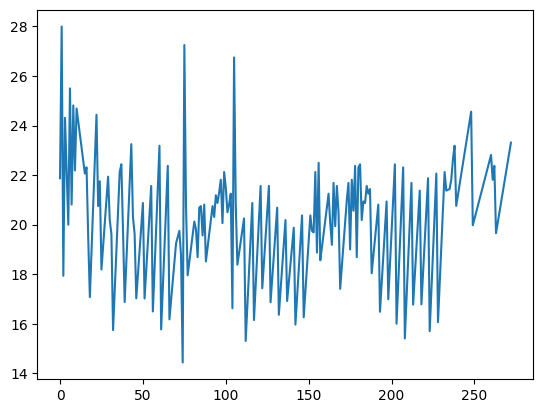

In [223]:
plt.plot(df_laps.loc[(df_laps.swim_stroke==stroke) & (df_laps.length_nr>0),'total_elapsed_time' ])

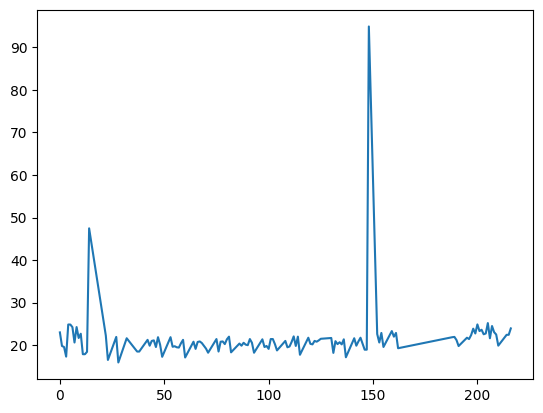

In [204]:
plt.plot(df_sel.loc[(df_sel.swim_stroke==stroke) & (df_sel.length_nr>0),'total_elapsed_time' ])

In [161]:
for lap in df_sel.lap_nr.unique():
    # select the relevant stroke and omit lap totals. Then select the current lap. 
    df_sel.loc[(df_sel.swim_stroke==stroke) & (df_sel.length_nr>0) ]

,sub_sport,total_distance,total_elapsed_time,total_cycles,avg_stroke_count,total_calories,avg_speed,num_laps,num_active_lengths,avg_heart_rate,swim_stroke,num_lengths,first_length_index,avg_swimming_cadence,total_strokes,length_type,elapsed_time,lap_nr,length_nr,cumsum,start_time,time_interval,SWOLF,cadence_diff
0,NaN,NaN,23.000000,NaN,NaN,5.0,1.087,NaN,NaN,NaN,freestyle,NaN,NaN,23.0,9.0,active,600900.0,0,1,23.000,600671.478,344.522,32.000,NaN
1,NaN,NaN,19.812000,NaN,NaN,5.0,1.262,NaN,NaN,NaN,freestyle,NaN,NaN,27.0,9.0,active,600900.0,0,2,42.812,600671.478,344.522,28.812,4.0
2,NaN,NaN,19.562000,NaN,NaN,5.0,1.278,NaN,NaN,NaN,freestyle,NaN,NaN,31.0,10.0,active,600900.0,0,3,62.374,600671.478,344.522,29.562,4.0
3,NaN,NaN,17.312000,NaN,NaN,5.0,1.444,NaN,NaN,NaN,freestyle,NaN,NaN,31.0,9.0,active,600900.0,0,4,79.686,600671.478,344.522,26.312,0.0
4,NaN,NaN,24.851375,NaN,NaN,5.0,0.830,NaN,NaN,NaN,freestyle,NaN,NaN,30.0,15.0,active,600900.0,0,5,109.811,600671.478,344.522,45.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,19.888000,NaN,NaN,5.0,1.257,NaN,NaN,NaN,freestyle,NaN,NaN,27.0,9.0,active,604786.0,42,16,366.073,604419.927,366.073,28.888,2.0
211,lap_swimming,400.0,366.073000,170.0,NaN,80.0,NaN,NaN,16.0,135.0,freestyle,16.0,153.0,NaN,NaN,NaN,604786.0,42,None,NaN,604419.927,366.073,NaN,NaN
214,NaN,NaN,22.437000,NaN,NaN,5.0,1.114,NaN,NaN,NaN,freestyle,NaN,NaN,21.0,8.0,active,604936.0,44,1,22.437,604843.309,92.691,30.437,NaN
215,NaN,NaN,22.437000,NaN,NaN,5.0,1.114,NaN,NaN,NaN,freestyle,NaN,NaN,27.0,10.0,active,604936.0,44,2,44.874,604843.309,92.691,32.437,6.0


In [137]:
df_sel.loc[(df_sel.lap_nr==0),'total_elapsed_time']

0      23.000000
1      19.812000
2      19.562000
3      17.312000
4      24.851375
5      24.851375
6      24.234250
7      20.625000
8      24.250000
9      21.687000
10     22.687000
11     17.874875
12     17.874875
13     18.437250
14     47.463000
15    344.522000
Name: total_elapsed_time, dtype: float64

In [107]:
df_sel.loc[df_sel.lap_nr==0,'swim_stroke']

0     freestyle
1     freestyle
2     freestyle
3     freestyle
4     freestyle
5     freestyle
6     freestyle
7     freestyle
8     freestyle
9     freestyle
10    freestyle
11    freestyle
12    freestyle
13    freestyle
14    freestyle
15    freestyle
Name: swim_stroke, dtype: object

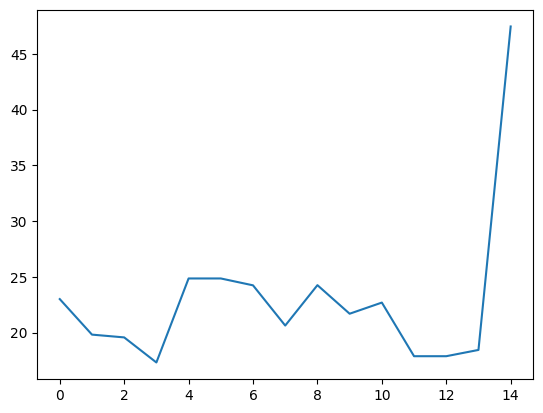

In [250]:
plt.plot(df_sel.loc[df_sel.lap_nr==0].iloc[:,0:20]['total_elapsed_time'][:-1])
# plt.plot(df.loc[df.lap_nr==36].iloc[:,0:20]['total_elapsed_time'][:-1])

In [444]:

# Reshape the dataframe
df_plot = df.melt(id_vars=['elapsed_time'], value_vars=['avg_speed'], var_name='metric', value_name='value')
